<a href="https://colab.research.google.com/github/wing787/books_Python_for_Geospatial_Data_Analysis/blob/main/ch_8/ch8_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ランタイム切断後に再度実行
# !pip install missingno

In [2]:
import pandas as pd
import missingno as msno
%matplotlib inline

In [3]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


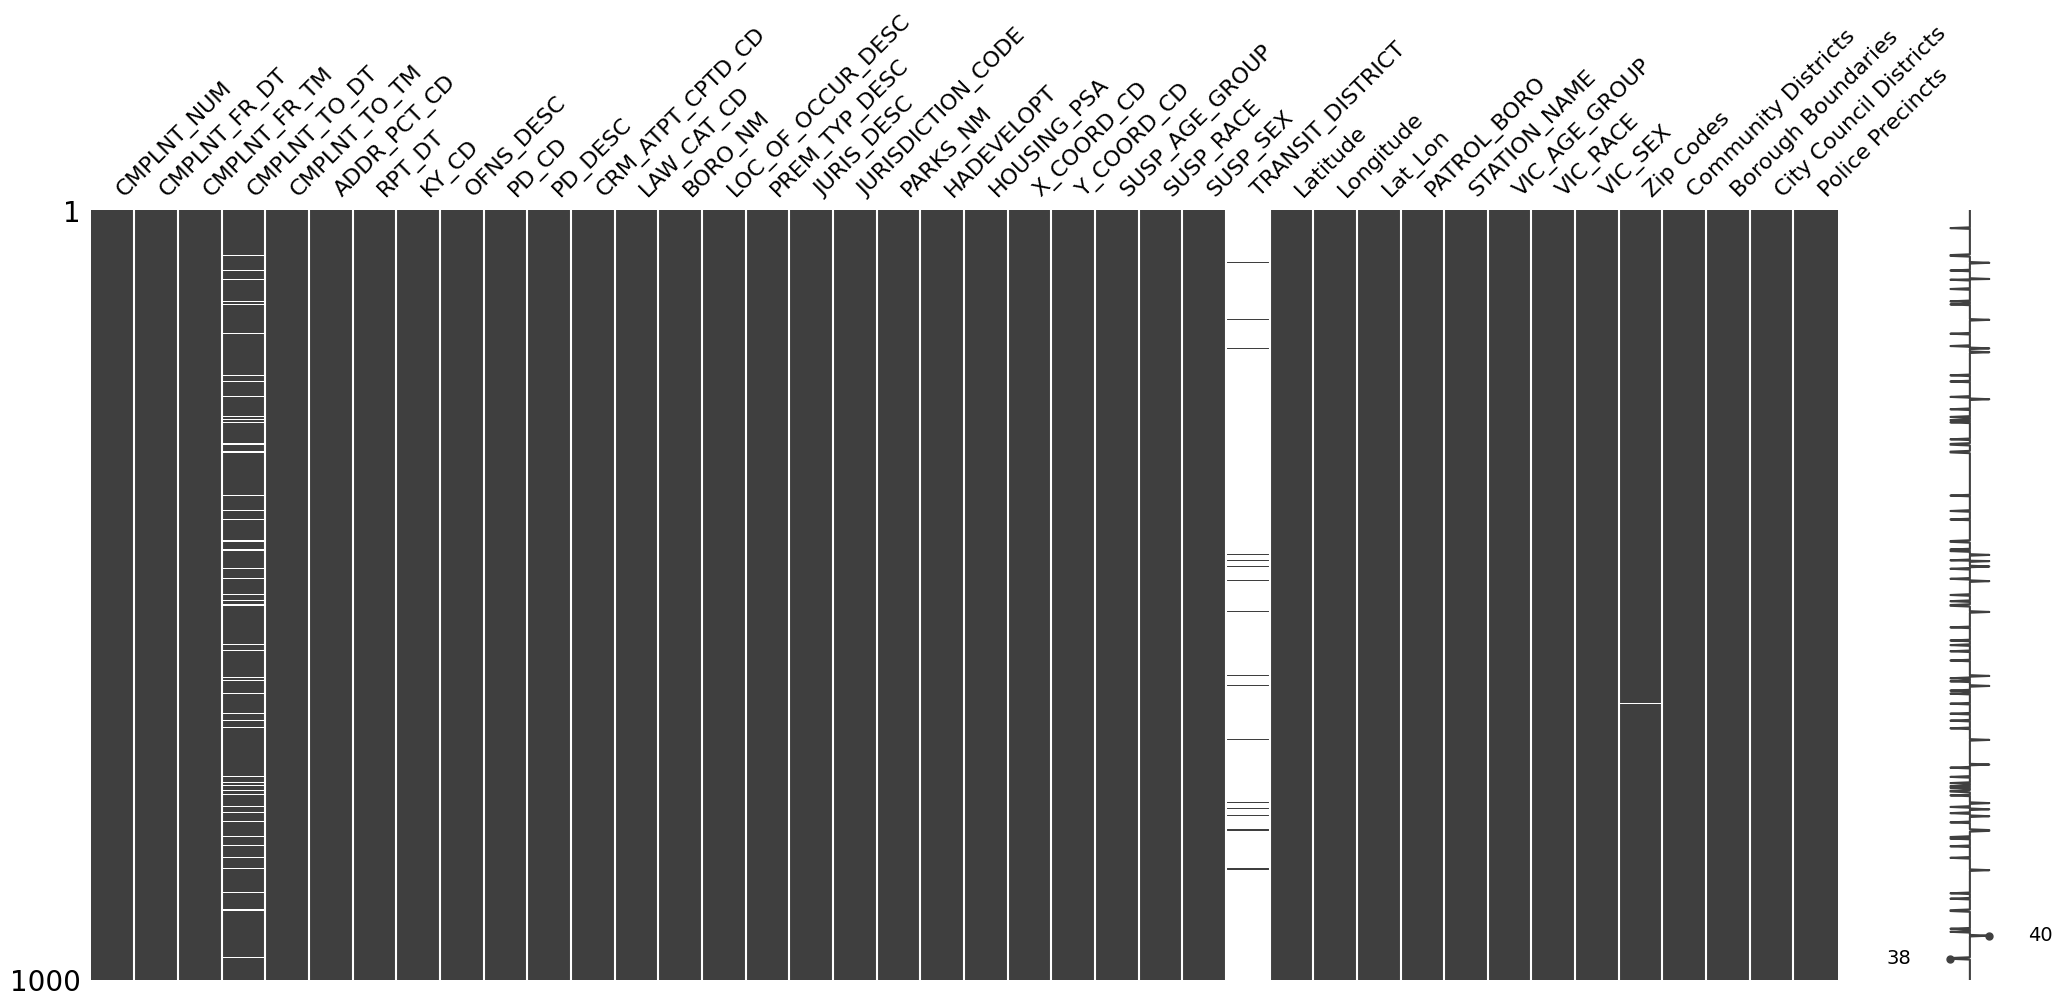

In [4]:
INPUT_FILE = '/content/drive/MyDrive/Colab Notebooks/Pythonによる地理空間データ分析_例題で学ぶロケーションインテリジェンス/NYPD_Complaint_Data_Historic_2020.csv'
NYPD = pd.read_csv(INPUT_FILE, parse_dates=['CMPLNT_FR_TM'])
msno.matrix(NYPD.sample(1000));

In [5]:
NYPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413391 entries, 0 to 413390
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CMPLNT_NUM              413391 non-null  object        
 1   CMPLNT_FR_DT            413391 non-null  object        
 2   CMPLNT_FR_TM            413391 non-null  datetime64[ns]
 3   CMPLNT_TO_DT            374435 non-null  object        
 4   CMPLNT_TO_TM            413391 non-null  object        
 5   ADDR_PCT_CD             413391 non-null  int64         
 6   RPT_DT                  413391 non-null  object        
 7   KY_CD                   413391 non-null  int64         
 8   OFNS_DESC               413391 non-null  object        
 9   PD_CD                   412944 non-null  float64       
 10  PD_DESC                 413391 non-null  object        
 11  CRM_ATPT_CPTD_CD        413391 non-null  object        
 12  LAW_CAT_CD              413391

In [6]:
NYPD = NYPD.drop(columns=['CMPLNT_TO_DT', 'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA'])
NYPD.dtypes.head()

CMPLNT_NUM              object
CMPLNT_FR_DT            object
CMPLNT_FR_TM    datetime64[ns]
CMPLNT_TO_TM            object
ADDR_PCT_CD              int64
dtype: object

In [7]:
NYPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413391 entries, 0 to 413390
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CMPLNT_NUM              413391 non-null  object        
 1   CMPLNT_FR_DT            413391 non-null  object        
 2   CMPLNT_FR_TM            413391 non-null  datetime64[ns]
 3   CMPLNT_TO_TM            413391 non-null  object        
 4   ADDR_PCT_CD             413391 non-null  int64         
 5   RPT_DT                  413391 non-null  object        
 6   KY_CD                   413391 non-null  int64         
 7   OFNS_DESC               413391 non-null  object        
 8   PD_CD                   412944 non-null  float64       
 9   PD_DESC                 413391 non-null  object        
 10  CRM_ATPT_CPTD_CD        413391 non-null  object        
 11  LAW_CAT_CD              413391 non-null  object        
 12  BORO_NM                 413391

In [8]:
NYPD.describe()

,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
count,413391.000000,413391.000000,412944.000000,413391.000000,4.133910e+05,413391.000000,7242.000000,413391.000000,413391.000000,413148.000000,413391.000000,413391.000000,413391.000000,413391.000000
mean,64.007937,304.471500,390.958762,0.648911,1.005473e+06,208029.818184,13.759321,40.737627,-73.923390,14507.627092,37.653761,3.303200,26.627290,39.465419
std,34.461315,159.561579,210.274709,6.599101,2.133598e+04,29795.618959,12.490668,0.081785,0.076949,3813.141997,21.109657,1.214612,14.668558,21.372088
min,1.000000,101.000000,100.000000,0.000000,9.136810e+05,122060.000000,1.000000,40.501456,-74.253766,10090.000000,1.000000,1.000000,1.000000,1.000000
25%,40.000000,117.000000,254.000000,0.000000,9.922450e+05,185018.000000,2.000000,40.674496,-73.971143,11605.000000,18.000000,2.000000,13.000000,23.000000
50%,66.000000,341.000000,343.000000,0.000000,1.005028e+06,206652.000000,11.000000,40.733897,-73.924942,13509.000000,40.000000,3.000000,25.000000,39.000000
75%,101.000000,351.000000,637.000000,0.000000,1.017478e+06,234516.000000,30.000000,40.810352,-73.879861,17215.000000,56.000000,4.000000,39.000000,59.000000
max,123.000000,678.000000,922.000000,97.000000,1.065829e+06,271819.000000,34.000000,40.912714,-73.705566,24894.000000,71.000000,5.000000,51.000000,77.000000


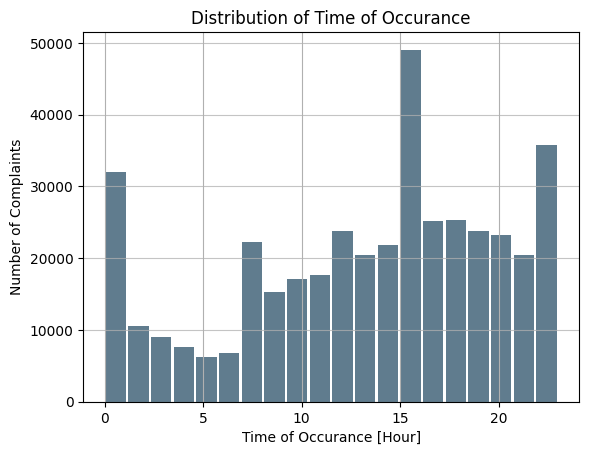

In [9]:
import matplotlib.pyplot as plt


Complaints = pd.Series(NYPD['CMPLNT_FR_TM'].dt.hour)
Complaints.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.title('Distribution of Time of Occurance')
plt.xlabel('Time of Occurance [Hour]')
plt.ylabel('Number of Complaints')
plt.grid(axis='y', alpha=0.75);

In [10]:
# データカラムの欠損値を集計
NYPD.isna().sum()

CMPLNT_NUM                     0
CMPLNT_FR_DT                   0
CMPLNT_FR_TM                   0
CMPLNT_TO_TM                   0
ADDR_PCT_CD                    0
RPT_DT                         0
KY_CD                          0
OFNS_DESC                      0
PD_CD                        447
PD_DESC                        0
CRM_ATPT_CPTD_CD               0
LAW_CAT_CD                     0
BORO_NM                        0
LOC_OF_OCCUR_DESC              0
PREM_TYP_DESC                  0
JURIS_DESC                     0
JURISDICTION_CODE              0
X_COORD_CD                     0
Y_COORD_CD                     0
SUSP_AGE_GROUP                 0
SUSP_RACE                      0
SUSP_SEX                       0
TRANSIT_DISTRICT          406149
Latitude                       0
Longitude                      0
Lat_Lon                        0
PATROL_BORO                    0
STATION_NAME                   0
VIC_AGE_GROUP                  0
VIC_RACE                       0
VIC_SEX   

In [11]:
INPUT_FILE = '/content/drive/MyDrive/Colab Notebooks/Pythonによる地理空間データ分析_例題で学ぶロケーションインテリジェンス/NYPD_Complaint_Data_Historic_2020.csv'
df_test = pd.read_csv(INPUT_FILE, na_values = 'NaN')
df_test

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,260638317,01/21/2020,00:00:00,09/15/2020,00:00:00,1,12/29/2022,112,THEFT-FRAUD,739.0,...,PATROL BORO MAN SOUTH,(null),UNKNOWN,UNKNOWN,E,10365.0,56,4,32,1
1,260547755,04/16/2020,13:00:00,12/21/2022,13:00:00,46,12/27/2022,109,GRAND LARCENY,425.0,...,PATROL BORO BRONX,(null),65+,WHITE HISPANIC,F,10931.0,6,5,29,29
2,260515181,12/26/2020,17:55:00,12/26/2022,18:15:00,46,12/26/2022,232,POSSESSION OF STOLEN PROPERTY,490.0,...,PATROL BORO BRONX,(null),65+,BLACK,M,10931.0,6,5,29,29
3,260537980,01/01/2020,08:00:00,12/25/2022,14:00:00,104,12/25/2022,361,OFF. AGNST PUB ORD SENSBLTY &,662.0,...,PATROL BORO QUEENS NORTH,(null),18-24,WHITE,F,14788.0,54,3,34,62
4,260468449,02/15/2020,00:09:00,02/15/2020,00:23:00,78,12/24/2022,355,OFFENSES AGAINST THE PERSON,115.0,...,PATROL BORO BKLYN SOUTH,(null),UNKNOWN,UNKNOWN,M,17619.0,14,2,38,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413386,206901339,01/01/2020,06:45:00,01/01/2020,07:00:00,104,01/01/2020,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,PATROL BORO QUEENS NORTH,(null),25-44,ASIAN / PACIFIC ISLANDER,F,15310.0,54,3,34,62
413387,206898168,01/01/2020,00:15:00,01/01/2020,00:15:00,18,01/01/2020,109,GRAND LARCENY,405.0,...,PATROL BORO MAN SOUTH,(null),25-44,WHITE,M,12081.0,12,4,10,10
413388,206893317,01/01/2020,04:35:00,01/01/2020,04:37:00,6,01/01/2020,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,PATROL BORO MAN SOUTH,(null),45-64,WHITE,F,12077.0,57,4,10,3
413389,206898895,01/01/2020,13:00:00,01/01/2020,13:10:00,108,01/01/2020,578,HARRASSMENT 2,638.0,...,PATROL BORO QUEENS NORTH,(null),18-24,WHITE HISPANIC,M,16858.0,53,3,33,66


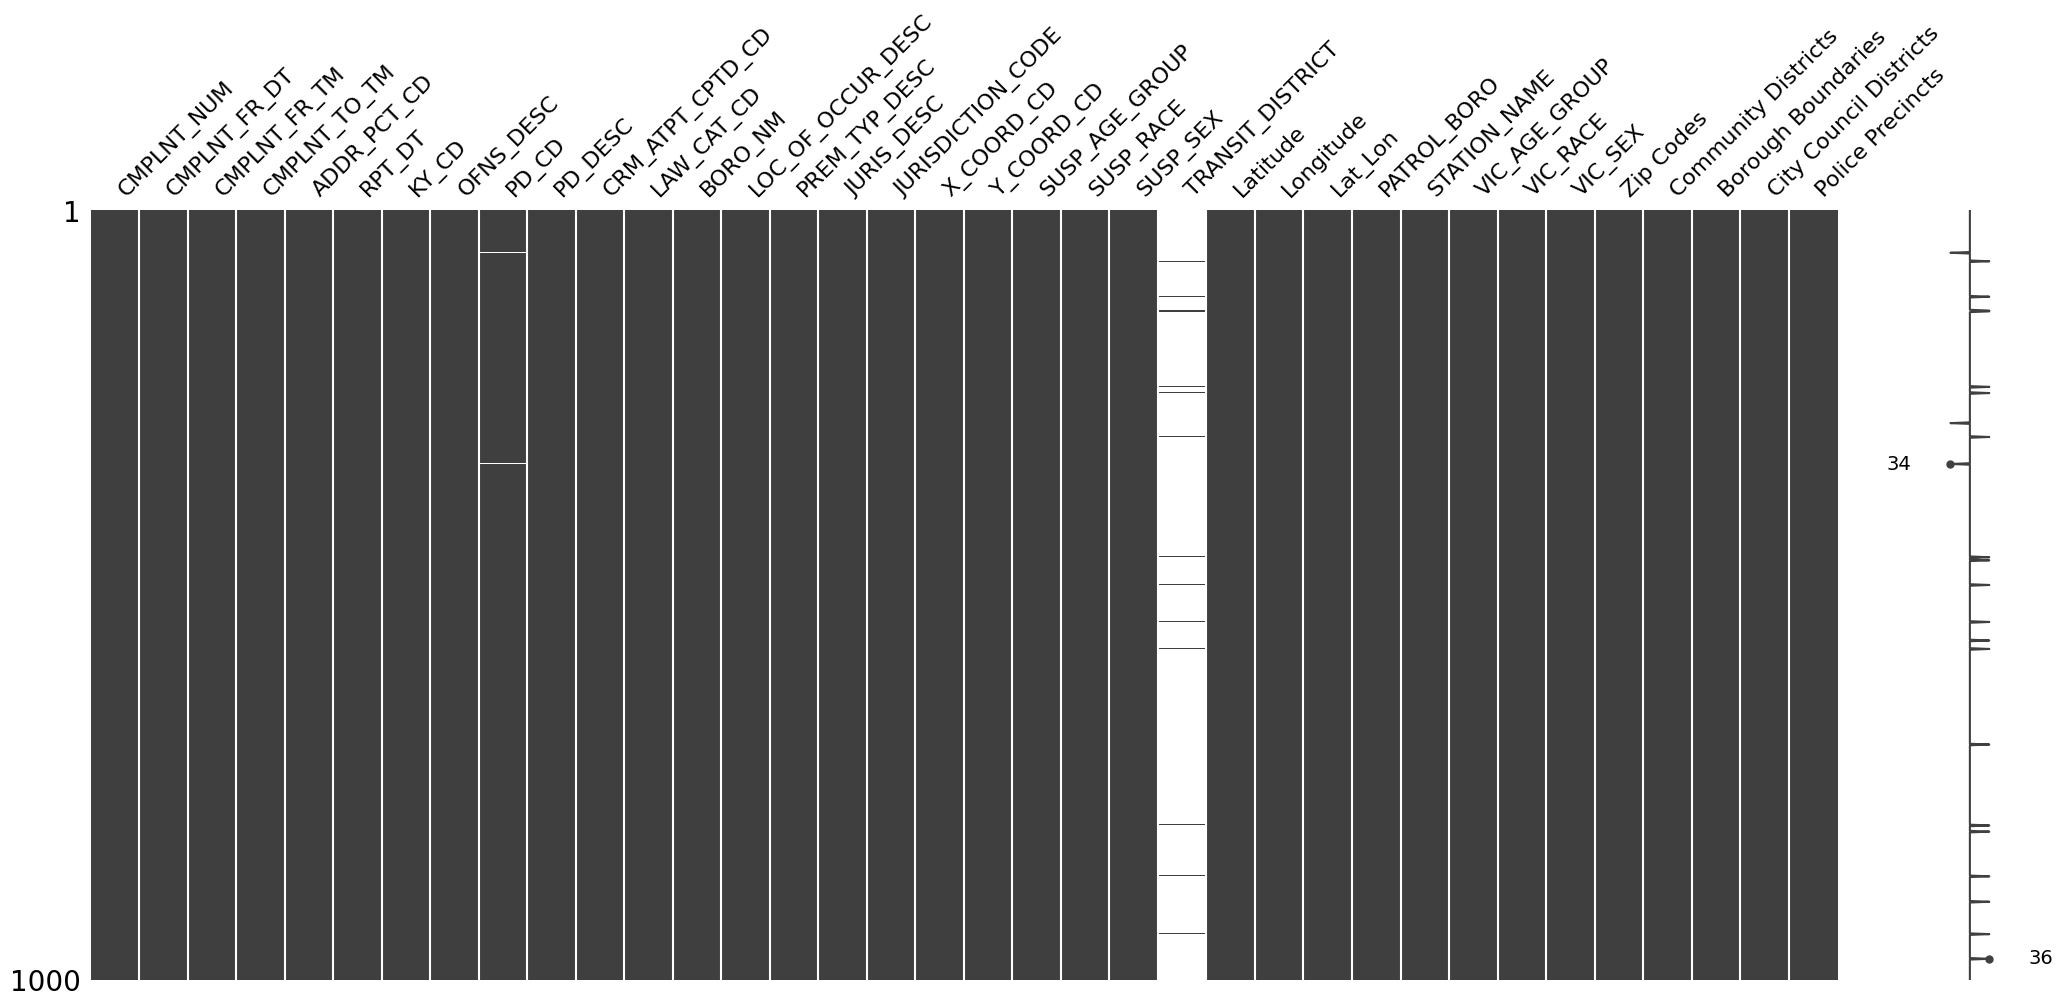

In [12]:
msno.matrix(NYPD.sample(1000));

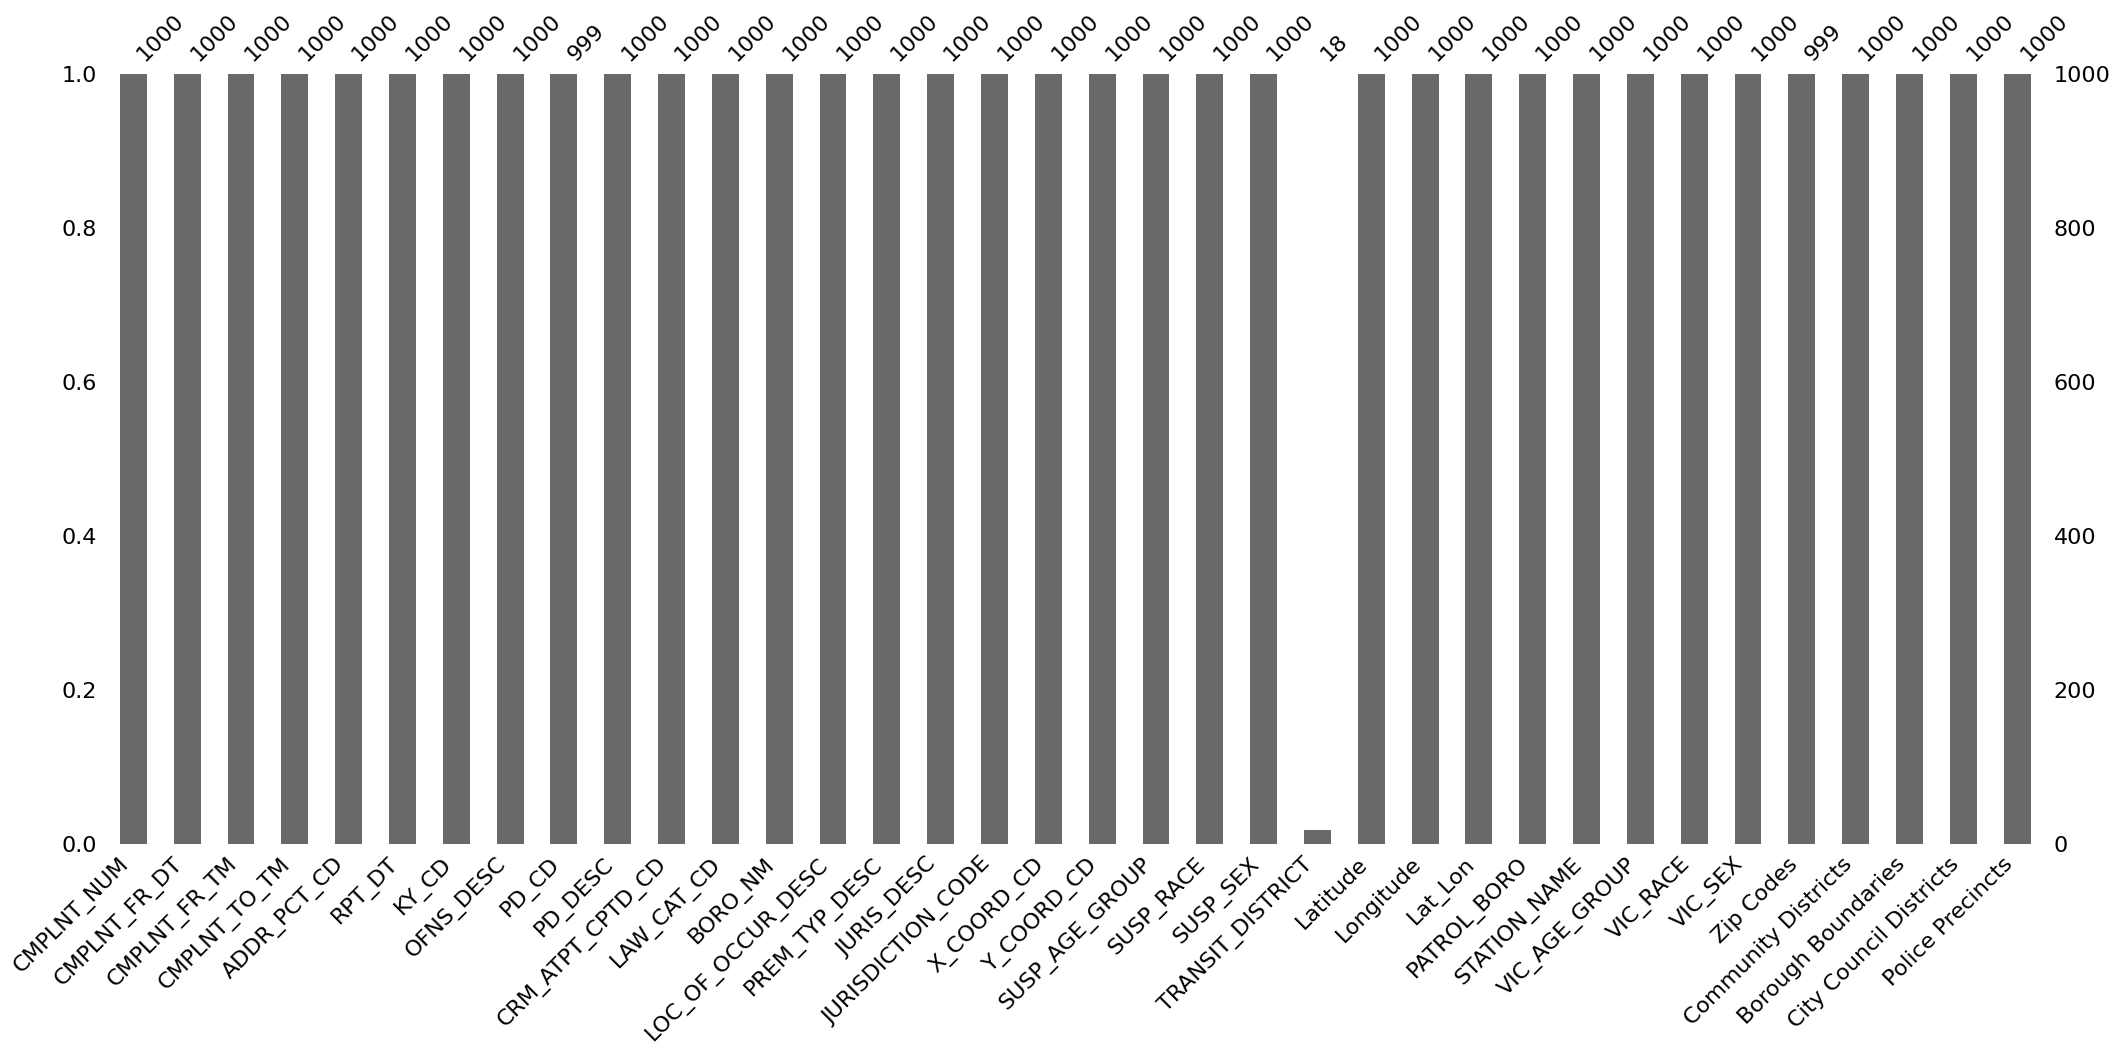

In [13]:
msno.bar(NYPD.sample(1000));

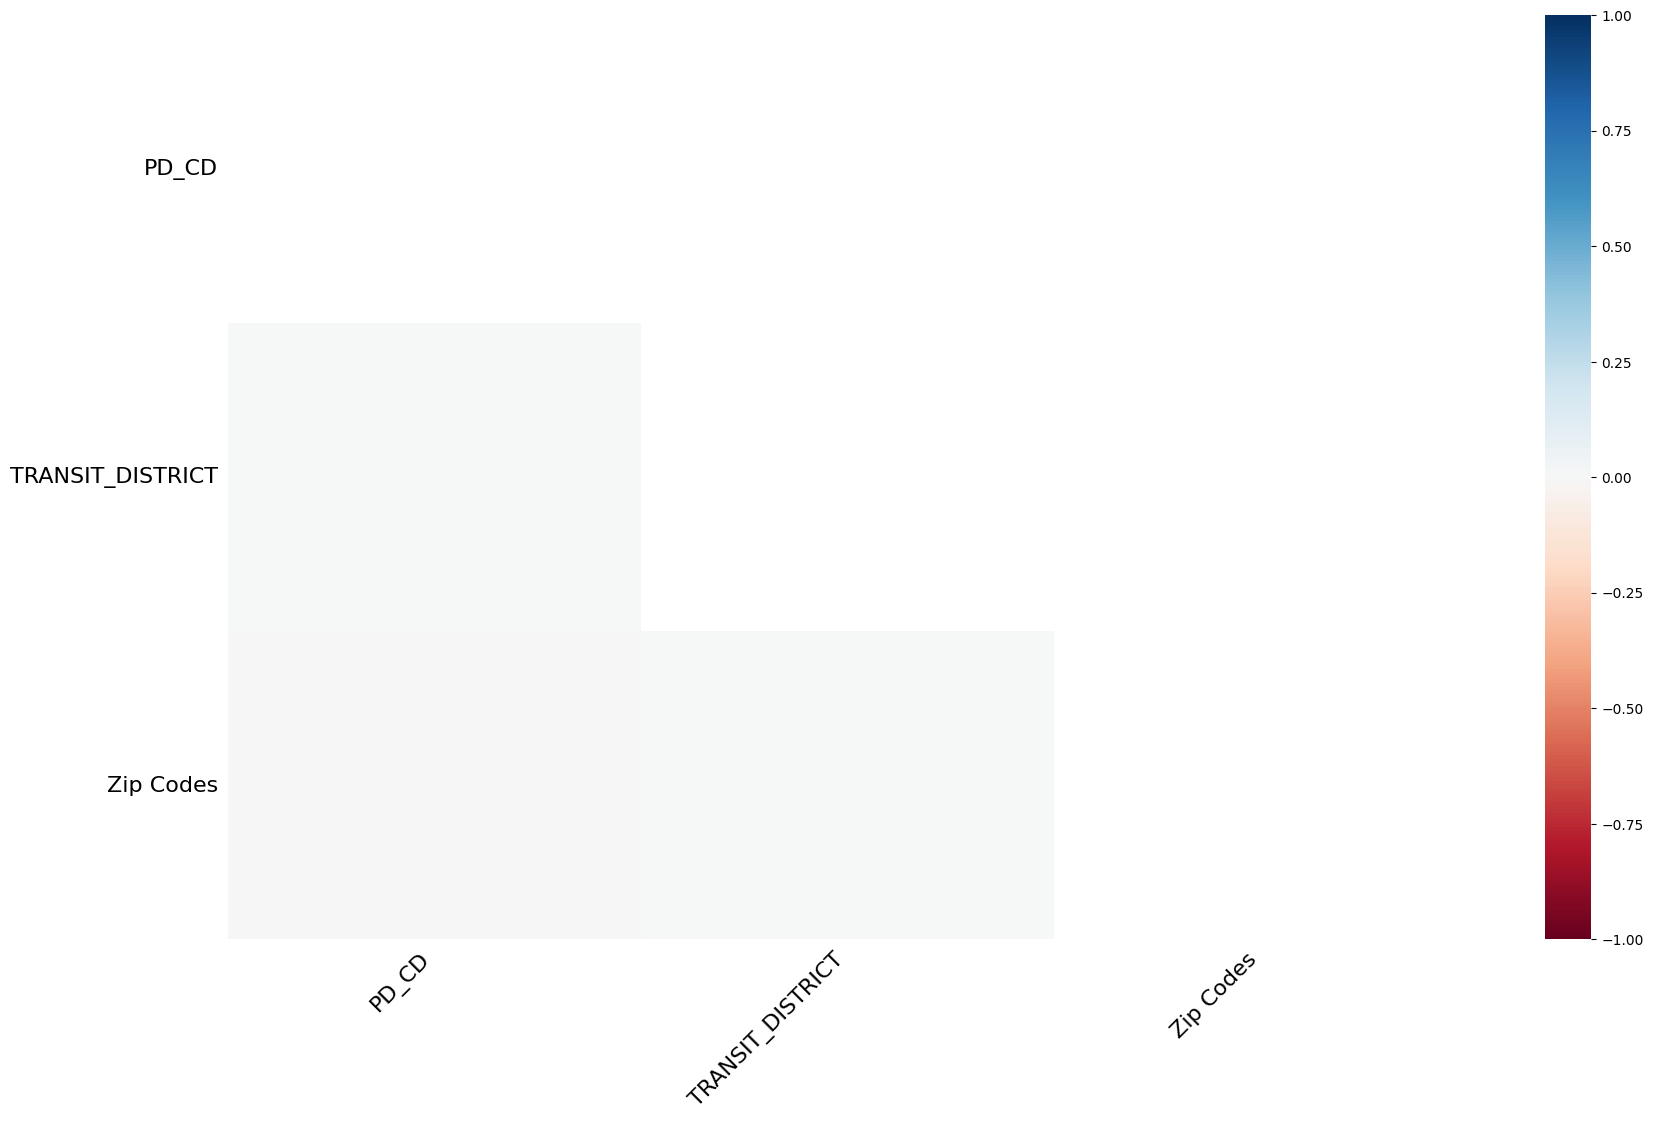

In [14]:
msno.heatmap(NYPD);

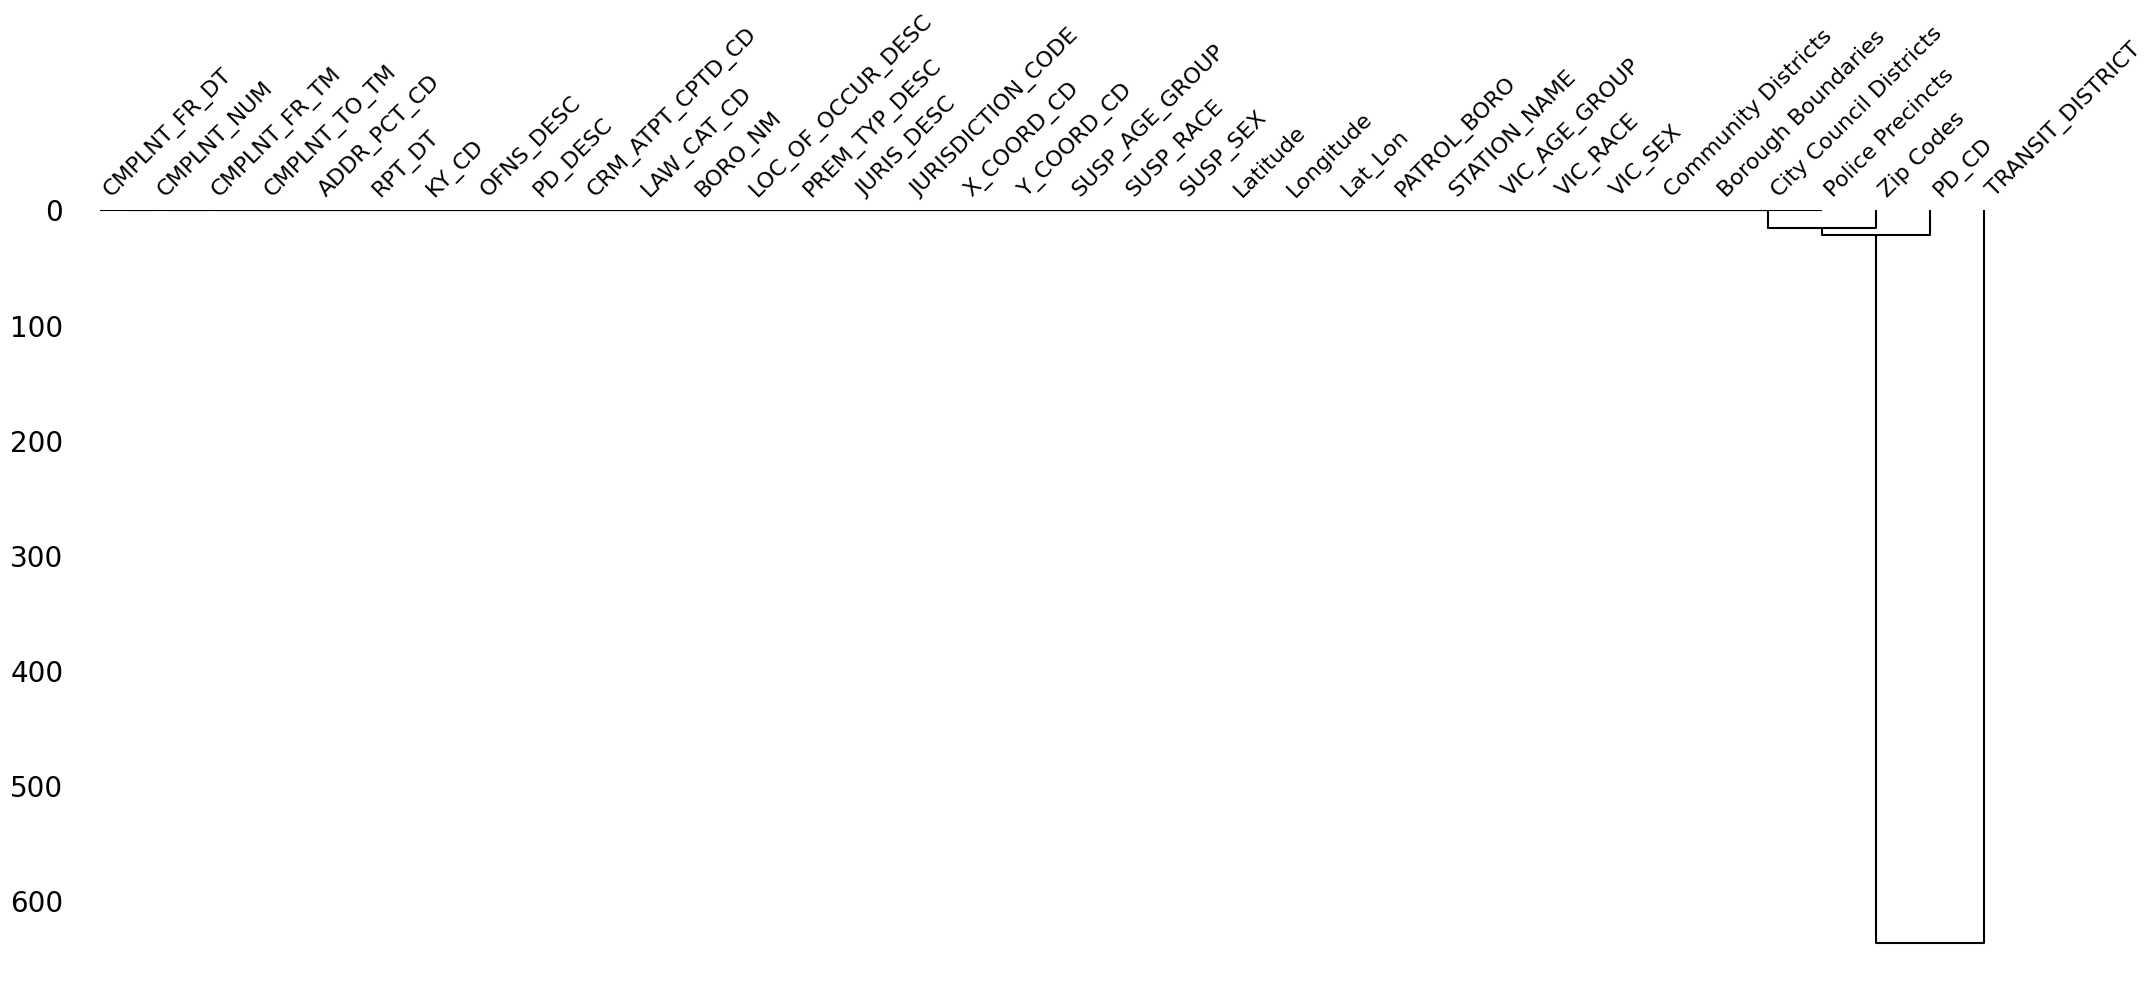

In [15]:
msno.dendrogram(NYPD);